In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

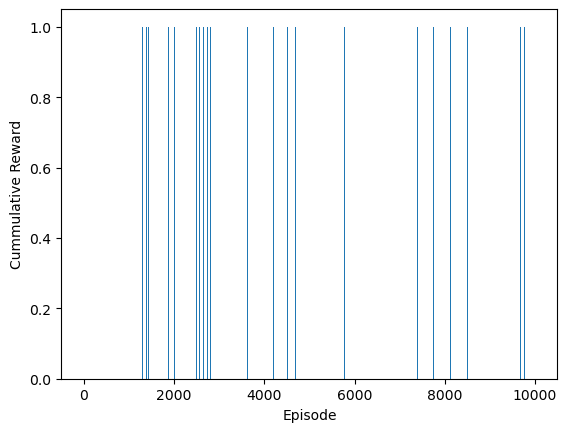

In [2]:
env = gym.make('FrozenLake-v1')

# Parameters
alpha = 0.1 # Learning Rate
gamma = 0.99 # Discount facot
epsilon = 0.5 # Exploration rate

# Initialize Q table
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Function to choose action using epsilon greedy strategy
def choose_action(state):
    if np.random.uniform() < epsilon:
        #Explore: choose a random action
        action = env.action_space.sample()
    else:
        # Explot: choose action with highest Q-value
        action = np.argmax(Q[state, :])
    return action

#Function to update Q table
def update_Q(state, action, reward, next_state, next_action):
    Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

n_episodes = 10000
reward_list = []
for i in range(n_episodes):
    # Rest environment and get initial state
    state = env.reset()
    done = False
    total_reward = 0
    
    # Choose the first action
    action = choose_action(state)
    
    # Loop over time steps within ine episode
    while not done:
        #env.render()
        # Take action and observe next state and reward
        next_state, reward, done, _ = env.step(action)
        
        # Choose next action using epison-greedy strategy
        next_action = choose_action(next_state)
        
        # Update the Q table
        update_Q(state, action, reward, next_state, next_action)
        
        state = next_state
        action = next_action
        
        total_reward += reward
    # Append episode total reward to list
    reward_list.append(total_reward)
plt.bar(np.arange(n_episodes), reward_list)
plt.xlabel('Episode')
plt.ylabel('Cummulative Reward')
plt.show()